In [1]:
import matplotlib.pyplot as plt
import numpy
import json
classes = ['OOK', '4ASK', '8ASK', 'BPSK', 'QPSK', '8PSK', '16PSK', '32PSK', '16APSK', '32APSK', '64APSK', '128APSK',
           '16QAM', '32QAM', '64QAM', '128QAM', '256QAM', 'AM-SSB-WC', 'AM-SSB-SC', 'AM-DSB-WC', 'AM-DSB-SC', 'FM',
           'GMSK', 'OQPSK']
snrs = [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]

In [ ]:
classes = ['LFM', 'LFM_triang', 'LFM_esc', '2FSK', '4FSK', '8FSK', 'Costas','2PSK', '4PSK', '8PSK', 'Barker', 'Frank', 'NM']
snrs = [8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [4]:
signal_accuracy_f = open('/Users/mariavictoriadacostarivas/Documents/GMR/AMC_transformers/Results/hierarchical/signal_acc.json')
signal_accuracy = json.load(signal_accuracy_f)


In [7]:
signal_accuracy

{'LFM': [98.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  0.0,
  0.0],
 'LFM_triang': [90.0,
  96.0,
  99.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  0.0,
  0.0],
 'LFM_esc': [84.0,
  93.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  0.0,
  0.0],
 '2FSK': [61.0,
  88.0,
  98.0,
  99.0,
  99.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  99.0,
  99.0,
  100.0,
  0.0,
  0.0],
 '4FSK': [63.0,
  82.0,
  96.0,
  97.0,
  98.0,
  99.0,
  100.0,
  99.0,
  100.0,
  99.0,
  100.0,
  100.0,
  99.0,
  98.0,
  99.0,
  0.0,
  0.0],
 '8FSK': [68.0,
  85.0,
  91.0,
  98.0,
  100.0,
  100.0,
  100.0,
  99.0,
  100.0,
  99.0,
  99.0,
  100.0,
  98.0,
  99.0,
  100.0,
  0.0,
  0.0],
 'Costas': [65.0,
  78.0,
  84.0,
  93.0,
  98.0,
  98.0,
  100.0,
  100.0,
 

In [14]:
signal_acc = dict()
for key,value in signal_accuracy.items():
    signal_acc[key]= []
    for i in range(len(snrs)):
        signal_acc[key].append(value[i])

In [16]:
hierarchical_acc = dict()
for i in classes:
    hierarchical_acc[i] = []
hierarchical_acc['LFM'] = [0.2796 , 0.607, 0.7208, 0.7650,0.8333,0.8504,0.9354,0.9742,0.9771,0.9896]
hierarchical_acc['LFM_triang'] = [0.476,  0.4325 ,0.3788,0.3750,0.3750,0.3750,0.3750,0.3750,0.3750,0.3750]
hierarchical_acc['LFM_esc'] = [0.522,0.746,0.742,0.756,0.749,0.741,0.742,0.708,0.655,0.659]
hierarchical_acc['2FSK'] = [0.609230769230769,0.827692307692308,0.863076923076923,0.898461538461538,0.906923076923077,0.936153846153846,0.933076923076923,0.948461538461538,0.951538461538462,0.952307692307692]
hierarchical_acc['4FSK'] = [0.567272727272727,0.649090909090909,0.711818181818182,0.743636363636364,0.740909090909091,0.785454545454545,0.77,0.781818181818182,0.774545454545455,0.786363636363636]
hierarchical_acc['8FSK'] = [0.575,0.796666666666667,0.831666666666667,0.855,0.85,0.873333333333333,0.875,0.851666666666667,0.863333333333333,0.861666666666667]
hierarchical_acc['Costas'] = [0.225384615384615,0.5,0.629230769230769,0.693846153846154,0.752307692307692,0.783846153846154,0.790769230769231,0.806153846153846,0.860769230769231,0.874615384615385]
hierarchical_acc['2PSK'] = [0.694,0.628,0.548,0.528,0.554,0.596,0.576,0.602,0.618,0.598]
hierarchical_acc['4PSK'] = [0.353333333333333,0.33,0.39,0.423333333333333,0.445555555555556,0.476666666666667,0.472222222222222,0.484444444444444,0.5,0.505555555555556]
hierarchical_acc['8PSK'] = [0.634444444444444,0.974444444444444,0.995555555555556,0.996666666666667,0.997777777777778,0.995555555555556,0.995555555555556,0.992222222222222,0.99,0.993333333333333]
hierarchical_acc['Barker'] = [0.08,0.35,0.638333333333333,0.806666666666667,0.834444444444444,0.868888888888889,0.875555555555556,0.877777777777778,0.877777777777778,0.886111111111111]
hierarchical_acc['Frank'] = [0.018,0.112666666666667,0.342,0.583333333333333,0.694,0.756666666666667,0.804,0.845333333333333,0.86,0.857333333333333]
hierarchical_acc['NM'] = [0.691428571428571,0.907142857142857,0.967142857142857,0.987142857142857,0.988571428571429,0.997142857142857,1,0.997142857142857,0.998571428571429,1]


In [18]:
for key,value in hierarchical_acc.items():
    hierarchical_acc[key] = [a*100 for a in value]

In [44]:
len(classes)
len(colors)


15

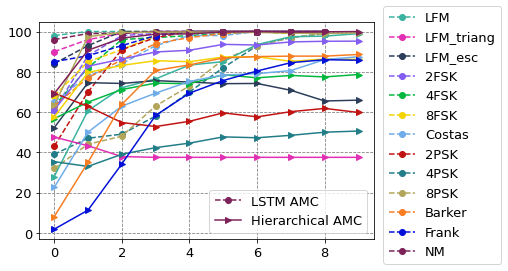

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['#39b39f', '#e130b3', '#2b3d59', '#835df0', '#01b73e', '#f4d302', '#6eacea', '#c01312', '#217d87', '#b2a65b', '#f77d23', '#0210d8', '#7c2259']
for n, i in enumerate(classes):
    lstm, = ax.plot(signal_acc[i][:9], linestyle='--', marker='o', color=colors[n])
for n, i in enumerate(classes):
    hierarchical, = ax.plot(hierarchical_acc[i], marker='>', color=colors[n])
plt.legend(classes, fontsize=13, loc='upper right', bbox_to_anchor=(1.4,1.1))
plt.grid(color = "grey", linewidth = "0.8", linestyle = "--")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg1 = ax.legend(classes, fontsize=13, loc='upper right', bbox_to_anchor=(1.4,1.1))
# Add second legend for the maxes and mins.
# leg1 will be removed from figure
leg2 = ax.legend([lstm, hierarchical],['LSTM AMC','Hierarchical AMC'], loc='lower right', fontsize=13)
# Manually add the first legend back
ax.add_artist(leg1)
plt.savefig('/Users/mariavictoriadacostarivas/Documents/GMR/AMC_transformers/Results/hierarchical/hierarchical_comp.png', bbox_inches='tight')


In [66]:
sensitivity_hierarchical =[]
for k,val in hierarchical_acc.items():
    for i  in range(len(val)):
        if val[i] >= 90:
            sensitivity_hierarchical.append(snrs[i])
            break
        elif i == len(val) - 1:
            sensitivity_hierarchical.append(10)
sensitivity_lstm =[]
for k,val in signal_acc.items():
    for i  in range(len(val)):
        if val[i] >= 90:
            sensitivity_lstm.append(snrs[i])
            break
        elif i == len(val) - 1:
            sensitivity_lstm.append(10)


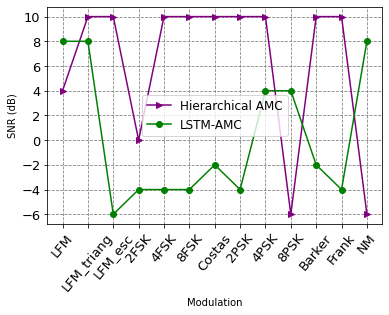

In [77]:
output_path= '/Users/mariavictoriadacostarivas/Documents/GMR/AMC_transformers/Results/hierarchical/'
plt.plot(classes, sensitivity_hierarchical, marker='>',color='purple')
plt.plot(classes,sensitivity_lstm, marker='o', color='green')
plt.yticks(numpy.arange(-6,12, 2), fontsize=13)
plt.xticks(classes, rotation=50, fontsize=13)
plt.xlabel('Modulation')
plt.ylabel('SNR (dB)')
plt.grid(color = "grey", linewidth = "0.8", linestyle = "--")
plt.legend(["Hierarchical AMC", "LSTM-AMC"], fontsize=12, loc='center')
plt.savefig(output_path + 'signal_accuracy.png', bbox_inches='tight')
#plt.show()

In [ ]:
signal_accuracy_f = open('/mnt/c/Users/mavi/AMC/Results/RadioMl/coms_signal.json')

signal_accuracy = json.load(signal_accuracy_f)


In [ ]:
output_path ="/mnt/c/Users/mavi/AMC/Results/RadioMl/"

In [ ]:
sensitivity = []
for k,val in signal_accuracy.items():
    for i  in range(len(val)):
        if val[i] >= 90:
            sensitivity.append(snrs[i])
            break
        elif i == len(val) - 1:
            sensitivity.append(30)


In [ ]:
sensitivity

In [ ]:
overall_acc_f = open('/mnt/c/Users/mavi/AMC/Results/RadioMl/coms_acc.json')
overall_accuracy = json.load(overall_acc_f)

In [ ]:
for k,val in overall_accuracy.items():
    overall_accuracy[k] = val*100

In [ ]:
f = plt.figure()
f.set_figwidth(8.5)
f.set_figheight(6.5)
ticks = []
plt.rcParams.update({'font.size': 12.5})
a = numpy.arange(0, 102, 2)
for i in a:
    if i %10 == 0:
        ticks.append(str(i))
    else:
        ticks.append("")
for i in range(len(classes)):
    if i+1 > 20:
        plt.plot(snrs, signal_accuracy[classes[i]], marker='o')
    elif i+1 > 10:
        plt.plot(snrs, signal_accuracy[classes[i]], marker='>')
    else:
        plt.plot(snrs, signal_accuracy[classes[i]], marker='s')

plt.grid(color = "grey", linewidth = "0.8", linestyle = "--")
plt.legend(classes, loc='upper right', bbox_to_anchor=(1.25,1.01), fontsize=11.5)
plt.yticks(a,ticks)
plt.xticks(numpy.arange(-20,35,5))
plt.xlabel("SNR (dB)")
plt.ylabel("Accuracy (%)")
#plt.savefig(output_path + 'signal_accuracy.png', bbox_inches='tight')
plt.show()

In [ ]:
overall_accuracy

In [ ]:
snr_10 = (overall_accuracy['0'] + overall_accuracy['2'] + overall_accuracy['4']  + overall_accuracy['6'] + overall_accuracy['8'] + overall_accuracy['10'])/6

In [ ]:
## from -10:5:30
GGCNN= [0.3264, 0.336,0.34, 0.3528,0.3728, 0.4088,0.44,0.491,0.5464, 0.6 , 0.6736, 0.7288, 0.78,0.841, 0.8872, 0.9272,0.9504,0.9704, 0.9784,  0.9888,0.9944]
GGCNN = [a*100 for a in GGCNN]
len(GGCNN)

In [ ]:
snr_10

In [ ]:
SE_MSFN = [0.0415, 0.0415, 0.0483, 0.056,0.1072, 0.1574, 0.2173, 0.27922, 0.3545, 0.4917, 0.6038, 0.7487,0.8772, 0.9497,  0.9758, 0.9816, 0.9816,0.9816,0.9816,0.9816,0.9816,0.9816,0.9816,0.9816,0.9816,0.9816]
SE_MSFN = [s*100 for s in SE_MSFN]
len(SE_MSFN)

In [ ]:
snrs[5:]

In [ ]:
ticks = []
a = numpy.arange(5, 105, 5)
for i in a:
    if i %10 == 0:
        ticks.append(str(i))
    else:
        ticks.append("")
#plt.rcParams['font.family'] = 'Times New Roman'
vals = [v for k,v in overall_accuracy.items()]
plt.plot(snrs[5:],vals[5:], marker='o', color='r')
plt.plot(snrs[5:], GGCNN, marker='>', color='m')
#plt.xticks(numpy.arange(-10,32, 2))
plt.yticks(a,ticks)
plt.ylabel('Accuracy (%)')
plt.xlabel('SNR (dB)')
plt.grid(color = "grey", linewidth = "0.8", linestyle = "--")
plt.legend(["3 LSTM", "GGCNN"])
plt.savefig(output_path + 'comparison_ggcnn.png')
#plt.show()

In [ ]:
sensitivity_radioml = [-2, 6, 2, -2, 2, 6, 10, 12, 4, 4, 8, 8, 6, 8, 20, 14, 30, -6, -2, 0, -2, 30, 2,30]

In [ ]:
f = plt.figure()
f.set_figwidth(9.5)
f.set_figheight(5.5)
ticks = []
a = numpy.arange(5, 105, 5)
for i in a:
    if i %10 == 0:
        ticks.append(str(i))
    else:
        ticks.append("")
#plt.rcParams['font.family'] = 'Times New Roman'
vals = [v for k,v in overall_accuracy.items()]
plt.plot(snrs,vals, marker='o', color='r')
plt.plot(snrs, SE_MSFN, marker='>', color='b')
plt.xticks(numpy.arange(-20,35, 5))
plt.yticks(a,ticks)
plt.ylabel('Accuracy (%)')
plt.xlabel('SNR (dB)')
plt.grid(color = "grey", linewidth = "0.8", linestyle = "--")
plt.legend(["3 LSTM", "SE-MSFN"])
plt.savefig(output_path + 'comparison_semsfn.png')
#plt.show()


In [ ]:
len(sensitivity_radioml)

In [ ]:
classes

In [ ]:
sensitivity_2 = [-2, 4, 4, -6, 0, 4, 8, 6, 2, 4, 6, 6, 4, 6, 10, 8, 10, -8, -2, 0,8, 30, 4, 6 ]
classes_modified = ['OOK',
 '4ASK',
 '8ASK',
 'BPSK',
 'QPSK',
 '8PSK',
 '16PSK',
 '32PSK',
 '16APSK',
 '32APSK',
 '64APSK',
 '128APSK',
 '16QAM',
 '32QAM',
 '64QAM',
 '128QAM',
 '256QAM',
 'FM',
 'GMSK',
 'OQPSK',
 'AM-SSB-WC',
 'AM-SSB-SC',
 'AM-DSB-WC',
 'AM-DSB-SC']

In [ ]:
a = numpy.arange(-8, 30, 2)
ticks = []
for i in a:
    if i %4 == 0:
        ticks.append(str(i))
    else:
        ticks.append("")

In [ ]:
plt.rcParams.update({'font.size': 11})
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(9,5))
plt.subplots_adjust(bottom=0.3)
plt.plot(classes_modified, sensitivity_2, marker='o', color = '#00BCD4')
plt.plot(classes_modified, sensitivity_radioml, marker='>', color = '#FF5722')
plt.yticks(numpy.arange(-8,30, 2), ticks)
plt.xticks(classes, rotation=50)
plt.xlabel('Modulation')
plt.ylabel('SNR (dB)')
plt.grid(color = "grey", linewidth = "0.8", linestyle = "--")
plt.legend(["LSTM framework: OTA and synthetic", "RadioML authors: synthetic"])
plt.savefig(output_path + 'sensitivity_radioml.png')
#plt.show()

In [13]:
a = numpy.arange(-8, 30, 2)
ticks = []
for i in a:
    if i %4 == 0:
        ticks.append(str(i))
    else:
        ticks.append("")

In [23]:
plt.rcParams.update({'font.size': 11})
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(9,5))
plt.subplots_adjust(bottom=0.3)
plt.plot(classes_modified, sensitivity_2, marker='o', color = '#00BCD4')
plt.plot(classes_modified, sensitivity_radioml, marker='>', color = '#FF5722')
plt.yticks(numpy.arange(-8,30, 2), ticks)
plt.xticks(classes, rotation=50)
plt.xlabel('Modulation')
plt.ylabel('SNR (dB)')
plt.grid(color = "grey", linewidth = "0.8", linestyle = "--")
plt.legend(["LSTM framework: OTA and synthetic", "RadioML authors: synthetic"])
plt.savefig(output_path + 'sensitivity_radioml.png')
#plt.show()